In [1]:
# Pandas
import pandas as pd

# SQL Alchemy
from sqlalchemy import create_engine

# PostgreSQL adapter for the Python programming language
import psycopg2

# Postgres password
from config import postgres_password

# Matplotlib for plotting
import matplotlib.pyplot as plt

In [2]:
# Postgres username, password, and database name 
POSTGRES_ADDRESS = 'localhost'
POSTGRES_PORT = '5432' 
POSTGRES_USERNAME = 'postgres'
POSTGRES_PASSWORD = postgres_password
POSTGRES_DBNAME = 'testing'

# A long string that contains the necessary Postgres login information 
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username=POSTGRES_USERNAME, 
                       password=POSTGRES_PASSWORD, 
                       ipaddress=POSTGRES_ADDRESS, 
                       port=POSTGRES_PORT, 
                       dbname=POSTGRES_DBNAME))

engine = create_engine(postgres_str)    
connection = engine.connect()

In [3]:
# Query the salary Records in the the Database
salary = pd.read_sql('SELECT "salary" FROM "Salaries";', connection)

In [4]:
salary.head()

,salary
0,60117
1,65828
2,40006
3,40054
4,78228


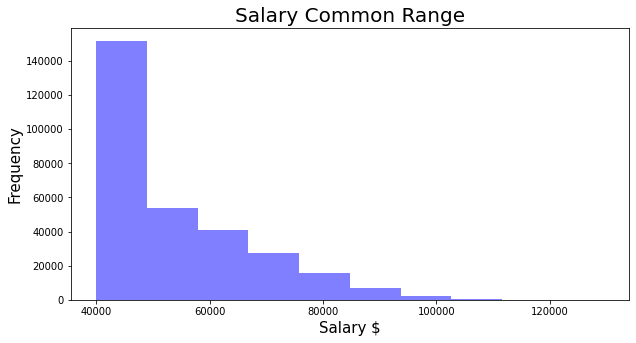

In [5]:
# Create histogram to visualize the most common salary ranges for employees
x = list(salary["salary"])
num_bins = 10


plt.figure(figsize=(10,5))
plt.hist(x, num_bins, facecolor='blue', alpha=0.5)

plt.xlabel('Salary $', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Salary Common Range', fontsize=20)
plt.show()

In [6]:
# Query the salary Records in the the Database
title_salary = pd.read_sql('SELECT "Salaries"."salary", "Titles"."title" FROM "Employees" INNER JOIN "Salaries" ON "Salaries"."emp_no"="Employees"."emp_no" INNER JOIN "Titles" ON "Titles"."title_id"="Employees"."emp_title_id";', connection)

In [7]:
title_salary.head()

,salary,title
0,78228,Staff
1,72488,Engineer
2,42365,Staff
3,55881,Senior Engineer
4,41538,Senior Engineer


In [8]:
title_salary_group = title_salary.groupby("title")
title_salary_group_mean = title_salary_group.mean()
title_salary_group_mean

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


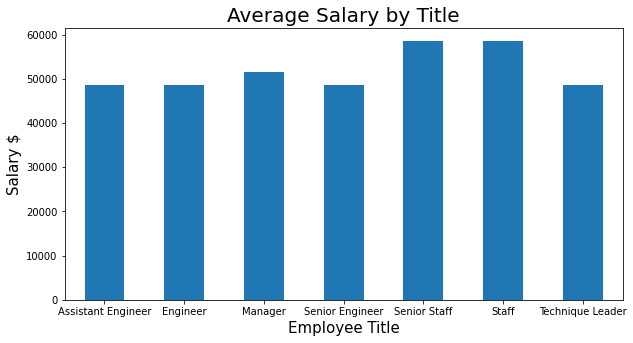

In [9]:
# Create a bar chart of average salary by title
title_salary_group_mean.plot(kind="bar", figsize=(10,5), rot=0, legend=None)
plt.title("Average Salary by Title", fontsize=20)
plt.xlabel("Employee Title", fontsize=15)
plt.ylabel("Salary $", fontsize=15)
plt.show()